# Powerlifting Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

## Scale factors
Constants used to project 1RM (one rep max) for different rep ranges from 1-10

In [2]:
scale_factors = {1:1,2:.96,3:.92,4:.89,5:.87,6:.84,7:.81,8:.79,9:.76,10:.74}

In [3]:
df = pd.read_csv('../data/WorkoutExport.csv')

## Filtering dataset

In [4]:
df = df[df['isWarmup'] == False] # Remove warm-up sets
df = df[(df['Reps'] < 11) & (df['Reps'] > 0)] # Keep only data with reps 1-10
df['Weight(lbs)'] = df['Weight(kg)'] * 2.20462 # Convert weight to lbs

# Add a column to dataframe containing projected 1RM for each row in data
scale_columns = [scale_factors[reps] for reps in df['Reps']] 
df['1RM'] = df['Weight(lbs)']/scale_columns

# Convert Date column to datetime
df['Date'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S %z') for d in df['Date']]
# 2020-07-15 00:10:55 +0000
df = df[['Date', 'Exercise', 'Reps', 'Weight(lbs)', '1RM']] # Select only relevant columns

In [5]:
# Keep only rows with highest 1RM for each exercise for each date
grouped = df.groupby(by = ['Date','Exercise'])
df = df[df['1RM'] == (grouped.transform('max')['1RM'])]
df = df.drop_duplicates()

# Create dataframes for each exercise

In [6]:
df_squat = df[(df['Exercise'] == 'Back Squat') & (df['Weight(lbs)'] > 186)] # remove additional warm-up sets
# print(df_squat.to_string())

In [7]:
df_bench = df[df['Exercise'] == 'Barbell Bench Press']
# print(df_bench.to_string())

In [8]:
df_deadlift = df[(df['Exercise'] == 'Deadlift') & (df['Weight(lbs)'] > 186)]
# print(df_deadlift.to_string())

In [9]:
df_sumo_deadlift = df[(df['Exercise'] == 'Sumo Deadlift') & (df['Weight(lbs)'] > 186)]
# print(df_sumo_deadlift.to_string())

## Visualizing data with matplotlib

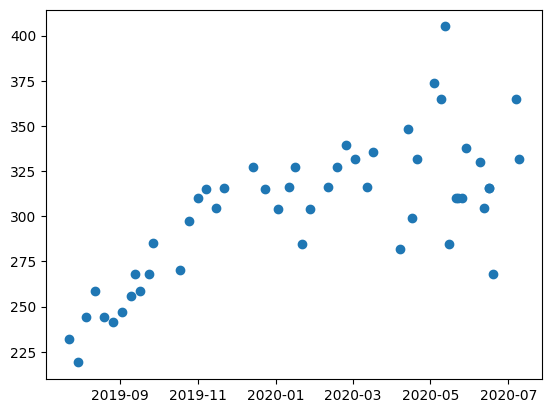

In [10]:
plt.scatter(df_squat['Date'], df_squat['1RM'])

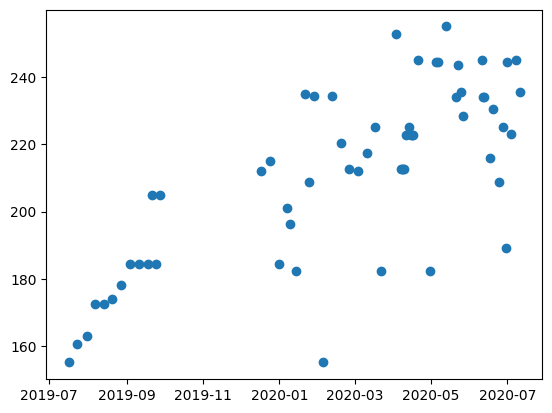

In [11]:
plt.scatter(df_bench['Date'], df_bench['1RM'])

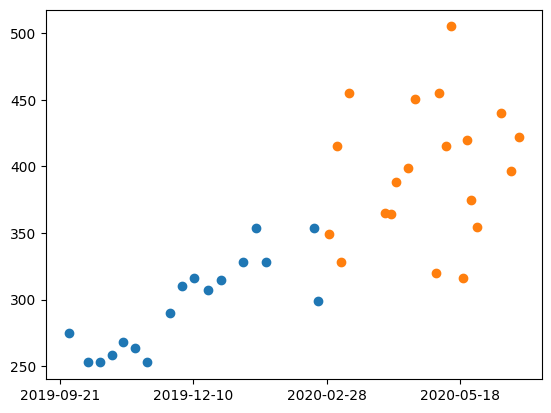

In [12]:
fig, ax = plt.subplots()
ax.scatter(df_deadlift['Date'], df_deadlift['1RM'])
ax.scatter(df_sumo_deadlift['Date'], df_sumo_deadlift['1RM'])

ax.xaxis.set_major_locator(plt.MaxNLocator(4))